In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Alzheimer_Webster.txt", sep=" ")

In [5]:
data.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966826-S,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,Y
WGACON.219,10223.2,131.0,1853.7,72.3,187.6,1765.2,165.0,649.9,273.2,152.3,...,319.1,82.0,45.0,209.1,217.2,25.5,211.9,364.8,61.7,0
WGACON.221,7306.5,85.4,1294.5,195.6,173.6,754.7,84.1,580.8,220.0,168.6,...,557.4,74.6,51.3,188.7,393.4,57.9,106.7,273.0,80.1,0
WGACON.234,4644.5,212.8,1286.5,28.3,330.7,845.7,1253.6,415.2,183.1,457.3,...,539.4,34.7,62.0,209.6,83.4,98.0,163.4,257.6,103.3,0
WGACON.274,5679.0,115.7,1009.1,106.4,403.0,579.9,222.1,249.5,239.0,62.6,...,530.8,49.7,39.2,186.9,130.4,74.3,133.2,292.3,99.7,0
WGACON.277,5648.3,124.8,982.0,145.2,360.5,905.1,73.5,364.2,241.0,130.8,...,693.3,101.8,53.9,186.6,235.3,73.1,81.3,385.4,93.7,0


In [4]:
data.index

Index(['WGACON.219', 'WGACON.221', 'WGACON.234', 'WGACON.274', 'WGACON.277',
       'WGACON.213', 'WGACON.25', 'WGACON.36', 'WGACON.268', 'WGACON.188',
       ...
       'WGAAD.305', 'WGAAD.71', 'WGAAD.394', 'WGAAD.62', 'WGAAD.76',
       'WGAAD.69', 'WGAAD.45', 'WGAAD.89', 'WGAAD.391', 'WGAAD.386'],
      dtype='object', length=364)

In [7]:
L = [x.split(".") for x in data.index]

In [8]:
data["type"] = [x[0] for x in L]

In [9]:
data.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,Y,type
WGACON.219,10223.2,131.0,1853.7,72.3,187.6,1765.2,165.0,649.9,273.2,152.3,...,82.0,45.0,209.1,217.2,25.5,211.9,364.8,61.7,0,WGACON
WGACON.221,7306.5,85.4,1294.5,195.6,173.6,754.7,84.1,580.8,220.0,168.6,...,74.6,51.3,188.7,393.4,57.9,106.7,273.0,80.1,0,WGACON
WGACON.234,4644.5,212.8,1286.5,28.3,330.7,845.7,1253.6,415.2,183.1,457.3,...,34.7,62.0,209.6,83.4,98.0,163.4,257.6,103.3,0,WGACON
WGACON.274,5679.0,115.7,1009.1,106.4,403.0,579.9,222.1,249.5,239.0,62.6,...,49.7,39.2,186.9,130.4,74.3,133.2,292.3,99.7,0,WGACON
WGACON.277,5648.3,124.8,982.0,145.2,360.5,905.1,73.5,364.2,241.0,130.8,...,101.8,53.9,186.6,235.3,73.1,81.3,385.4,93.7,0,WGACON


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["type"])
data["type"] = le.transform(data["type"]) 

In [113]:
test = True
for i in range(len(data)):
    if data["type"][i] + data["Y"][i] != 1:
        test = False

In [114]:
test

True

In [115]:
data.drop("type",axis=1,inplace=True)

La training set est balanced/équilibrée (188 vs 176). Par contre elle contient beaucoup de features et peu de samples (features >> samples) :

In [116]:
data.shape

(364, 8651)

In [34]:
data.drop("Y",axis=1,inplace=False)

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966826-S,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,type
WGACON.219,10223.2,131.000000,1853.7,72.300000,187.6,1765.2,165.0,649.9,273.2,152.3,...,319.1,82.000000,45.000000,209.1,217.200000,25.500000,211.9,364.8,61.700000,1
WGACON.221,7306.5,85.400000,1294.5,195.600000,173.6,754.7,84.1,580.8,220.0,168.6,...,557.4,74.600000,51.300000,188.7,393.400000,57.900000,106.7,273.0,80.100000,1
WGACON.234,4644.5,212.800000,1286.5,28.300000,330.7,845.7,1253.6,415.2,183.1,457.3,...,539.4,34.700000,62.000000,209.6,83.400000,98.000000,163.4,257.6,103.300000,1
WGACON.274,5679.0,115.700000,1009.1,106.400000,403.0,579.9,222.1,249.5,239.0,62.6,...,530.8,49.700000,39.200000,186.9,130.400000,74.300000,133.2,292.3,99.700000,1
WGACON.277,5648.3,124.800000,982.0,145.200000,360.5,905.1,73.5,364.2,241.0,130.8,...,693.3,101.800000,53.900000,186.6,235.300000,73.100000,81.3,385.4,93.700000,1
WGACON.213,5619.5,93.600000,940.6,144.900000,205.9,621.9,91.1,567.0,167.6,153.9,...,409.0,63.500000,46.200000,144.0,173.100000,64.100000,116.9,233.3,90.200000,1
WGACON.25,5622.4,65.900000,948.2,182.300000,334.0,454.3,110.8,605.3,231.7,87.9,...,274.2,48.300000,55.200000,335.9,85.800000,49.500000,219.7,331.7,79.600000,1
WGACON.36,5604.5,79.700000,919.3,124.600000,342.1,466.9,154.9,453.1,303.6,98.5,...,375.9,57.600000,29.800000,263.4,106.000000,45.800000,153.4,251.6,132.900000,1
WGACON.268,3725.8,82.900000,944.5,64.500000,291.5,567.2,218.1,638.2,147.9,103.6,...,379.8,66.200000,52.900000,203.9,75.000000,76.300000,200.2,168.8,125.800000,1
WGACON.188,5047.4,116.000000,928.0,71.400000,206.7,779.2,134.9,462.3,248.0,148.6,...,568.6,75.100000,27.600000,188.1,158.100000,80.100000,116.5,367.9,97.000000,1


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv("Alzheimer_Webster.txt", sep=" ")
#Train Test split
xTrain, xTest, yTrain, yTest = train_test_split(data.drop("Y",axis=1,inplace=False),data["Y"], test_size = 0.5, random_state = 0)
#Model 1

clf1 = LogisticRegression(dual=False)
clf1.fit(xTrain,yTrain)
Yp1 = clf1.predict(xTest)
Yr1 = clf1.predict_proba(xTest)
# model 2
clf2 = DecisionTreeClassifier(max_depth=10)
clf2.fit(xTrain,yTrain)
Yp2 = clf2.predict(xTest)
Yr2 = clf2.predict_proba(xTest)


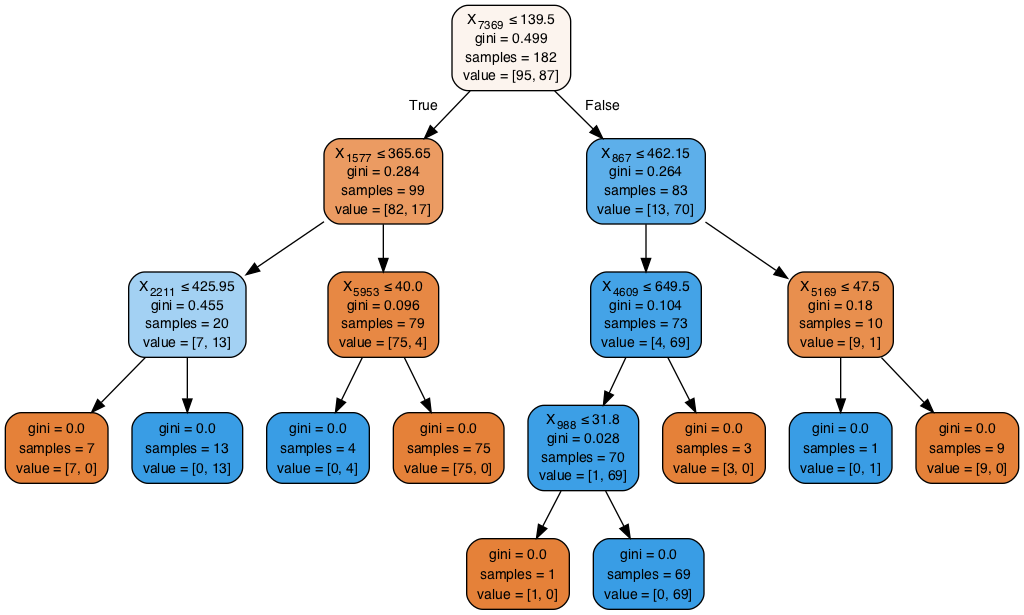

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

confmat1 = confusion_matrix(yTest,Yp1)
confmat2 = confusion_matrix(yTest,Yp2)
confmat1, confmat2

(array([[75, 18],
        [14, 75]]), array([[78, 15],
        [22, 67]]))

In [51]:
Yp1

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [52]:
Yr1

array([[2.95362792e-01, 7.04637208e-01],
       [4.11355175e-07, 9.99999589e-01],
       [6.77622217e-04, 9.99322378e-01],
       [9.99777642e-01, 2.22357708e-04],
       [9.99399992e-01, 6.00007863e-04],
       [1.78976833e-11, 1.00000000e+00],
       [9.99569513e-01, 4.30486679e-04],
       [9.99873751e-01, 1.26249095e-04],
       [1.00000000e+00, 1.92417702e-11],
       [9.99969372e-01, 3.06283879e-05],
       [9.95044677e-01, 4.95532257e-03],
       [1.00000000e+00, 1.30483595e-11],
       [5.62633124e-03, 9.94373669e-01],
       [6.98048926e-06, 9.99993020e-01],
       [9.94378443e-01, 5.62155702e-03],
       [6.06324778e-08, 9.99999939e-01],
       [9.79258664e-01, 2.07413365e-02],
       [4.39575234e-03, 9.95604248e-01],
       [9.99912703e-01, 8.72970161e-05],
       [5.25716351e-06, 9.99994743e-01],
       [5.33355719e-01, 4.66644281e-01],
       [9.99184860e-01, 8.15139706e-04],
       [8.71379178e-02, 9.12862082e-01],
       [8.92551075e-08, 9.99999911e-01],
       [9.999683

In [53]:
fpr, tpr, thresholds = roc_curve(yTest, Yr1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(yTest, Yr2[:,1])

In [54]:
tpr2

array([0.        , 0.75280899, 1.        ])

In [55]:
thresholds

array([1.00000000e+00, 9.99996859e-01, 9.99996155e-01, 9.99993209e-01,
       9.99993020e-01, 9.99930982e-01, 9.99907769e-01, 9.99676525e-01,
       9.99099412e-01, 9.98258753e-01, 9.98170098e-01, 9.96720654e-01,
       9.95062216e-01, 9.91038333e-01, 9.87102021e-01, 9.82425505e-01,
       9.65824903e-01, 9.12862082e-01, 8.90660391e-01, 8.26602989e-01,
       7.33002639e-01, 7.04637208e-01, 6.55777279e-01, 5.48569057e-01,
       3.16115471e-01, 2.88216983e-01, 2.85375096e-01, 1.15909029e-01,
       1.08343980e-01, 8.73588840e-02, 9.60913469e-03, 5.62155702e-03,
       5.61697804e-03, 4.95532257e-03, 3.46743212e-03, 2.51022836e-03,
       6.24199836e-04, 6.00007863e-04, 8.52609298e-05, 7.80368559e-05,
       6.61995220e-05, 5.65727560e-05, 3.39408002e-10, 1.58658811e-10,
       2.67112246e-11, 1.92536813e-11, 6.21476995e-15])

In [56]:
auc(fpr, tpr)

0.9121662438081429

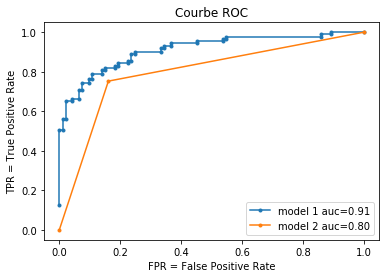

In [57]:
fix, ax = plt.subplots()
ax.plot(fpr, tpr, ".-", label="model 1 auc=%0.2f" % auc(fpr, tpr))
ax.plot(fpr2, tpr2, ".-", label="model 2 auc=%0.2f" % auc(fpr2, tpr2))
ax.set_xlabel("FPR = False Positive Rate")
ax.set_ylabel("TPR = True Positive Rate")
ax.legend()
ax.set_title("Courbe ROC");

### Cross validation

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf1 = LogisticRegression(dual=True)
scores = cross_validate(clf1, data.drop("Y",axis=1,inplace=False),data["Y"], scoring=scoring,cv=5)

In [60]:
scores

/Users/jedhouas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jedhouas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.77671814, 0.74996686, 0.71754289, 0.75383496, 0.73466396]),
 'score_time': array([0.00378394, 0.00307918, 0.00299001, 0.00296092, 0.0029521 ]),
 'test_precision_macro': array([0.83385093, 0.89076577, 0.82868217, 0.87      , 0.87755102]),
 'train_precision_macro': array([0.96979866, 0.97925723, 0.97696869, 0.98984962, 0.92429792]),
 'test_recall_macro': array([0.81432749, 0.89135338, 0.81879699, 0.81428571, 0.82857143]),
 'train_recall_macro': array([0.97      , 0.97957447, 0.97539007, 0.98959654, 0.90803626])}

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.arange(1,10,1)}
clf = LogisticRegression(dual=True)
clfG = GridSearchCV(clf, parameters, cv=5)
clfG.fit(data.drop("Y",axis=1,inplace=False),data["Y"])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
np.arange(1,10,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [67]:
clfG.best_estimator_.C

3

In [69]:
 clfG

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
clfG = GridSearchCV(clf, parameters, cv=5,error_score="F1_score")
clfG.fit(data.drop("Y",axis=1,inplace=False),data["Y"])

GridSearchCV(cv=5, error_score='F1_score',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

ValueError: could not convert string to float: '?'

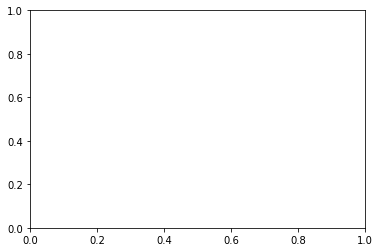

In [72]:
plt.plot(clfG.cv_results_["param_C"],clfG.cv_results_["mean_test_score"])
plt.show()

In [156]:
C_optm = clfG1.cv_results_["param_C"][np.argmax(clfG1.cv_results_["mean_test_score"])]
Score_optm = max(clfG1.cv_results_["mean_test_score"])

In [157]:
C_opm, Score_optm

(3, 0.8571428571428571)

In [139]:
clfG1.cv_results_["mean_train_score"]

/Users/jedhouas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.96979695, 0.97183062, 0.98146443, 0.91275003, 0.9560466 ,
       0.9746057 , 0.98283662, 0.97802091, 0.97457025])

In [140]:
clfG1.cv_results_["param_C"]

masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object)

### Régression logistique régularisée L1

In [145]:
clfL1 = LogisticRegression(penalty='l1',dual=False)
scores = cross_validate(clfL1, data.drop("Y",axis=1,inplace=False),data["Y"], scoring=scoring,cv=5)

In [148]:
clfGL1 = GridSearchCV(clfL1, parameters, cv=5,error_score="F1_score")
clfGL1.fit(data.drop("Y",axis=1,inplace=False),data["Y"])

GridSearchCV(cv=5, error_score='F1_score',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
clfGL1

GridSearchCV(cv=5, error_score='F1_score',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/jedhouas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


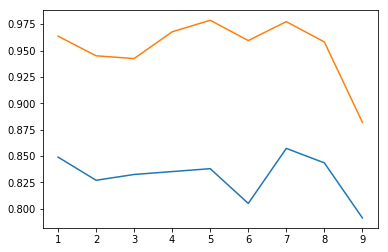

In [165]:
plt.plot(clfGL1.cv_results_["param_C"],clfG1.cv_results_["mean_test_score"])
plt.plot(clfGL1.cv_results_["param_C"],clfG1.cv_results_["mean_train_score"])
plt.show()

In [160]:
C_optm = clfGL1.cv_results_["param_C"][np.argmax(clfGL1.cv_results_["mean_test_score"])]
Score_optm = max(clfG1.cv_results_["mean_test_score"])

In [161]:
C_optm, Score_optm

(5, 0.8571428571428571)

### Comparaison L2 vs L1

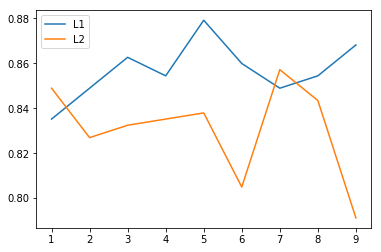

In [172]:
plt.plot(clfGL1.cv_results_["param_C"],clfGL1.cv_results_["mean_test_score"], label="L1")
plt.plot(clfG1.cv_results_["param_C"],clfG1.cv_results_["mean_test_score"], label="L2")
plt.legend()
plt.show()

In [10]:
type(data.Y)

pandas.core.series.Series

In [11]:
type(data.Y.values)

numpy.ndarray

In [12]:
data.Y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
data.values

array([[10223.2, 131.0, 1853.7, ..., 61.7, 0, 'WGACON'],
       [7306.5, 85.4, 1294.5, ..., 80.1, 0, 'WGACON'],
       [4644.5, 212.8, 1286.5, ..., 103.3, 0, 'WGACON'],
       ...,
       [3877.5, 192.2, 1260.5, ..., 152.3, 1, 'WGAAD'],
       [4029.4, 219.3, 1636.5, ..., 30.3, 1, 'WGAAD'],
       [3211.2, 205.8, 1487.1, ..., 66.8, 1, 'WGAAD']], dtype=object)

In [14]:
data.values.shape

(364, 8652)

In [19]:
data.iloc[3,:] = np.nan

In [20]:
data

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,Y,type
WGACON.219,10223.2,131.000000,1853.7,72.300000,187.6,1765.2,165.0,649.9,273.2,152.3,...,82.000000,45.000000,209.1,217.200000,25.500000,211.9,364.8,61.700000,0.0,WGACON
WGACON.221,7306.5,85.400000,1294.5,195.600000,173.6,754.7,84.1,580.8,220.0,168.6,...,74.600000,51.300000,188.7,393.400000,57.900000,106.7,273.0,80.100000,0.0,WGACON
WGACON.234,4644.5,212.800000,1286.5,28.300000,330.7,845.7,1253.6,415.2,183.1,457.3,...,34.700000,62.000000,209.6,83.400000,98.000000,163.4,257.6,103.300000,0.0,WGACON
WGACON.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WGACON.277,5648.3,124.800000,982.0,145.200000,360.5,905.1,73.5,364.2,241.0,130.8,...,101.800000,53.900000,186.6,235.300000,73.100000,81.3,385.4,93.700000,0.0,WGACON
WGACON.213,5619.5,93.600000,940.6,144.900000,205.9,621.9,91.1,567.0,167.6,153.9,...,63.500000,46.200000,144.0,173.100000,64.100000,116.9,233.3,90.200000,0.0,WGACON
WGACON.25,5622.4,65.900000,948.2,182.300000,334.0,454.3,110.8,605.3,231.7,87.9,...,48.300000,55.200000,335.9,85.800000,49.500000,219.7,331.7,79.600000,0.0,WGACON
WGACON.36,5604.5,79.700000,919.3,124.600000,342.1,466.9,154.9,453.1,303.6,98.5,...,57.600000,29.800000,263.4,106.000000,45.800000,153.4,251.6,132.900000,0.0,WGACON
WGACON.268,3725.8,82.900000,944.5,64.500000,291.5,567.2,218.1,638.2,147.9,103.6,...,66.200000,52.900000,203.9,75.000000,76.300000,200.2,168.8,125.800000,0.0,WGACON
WGACON.188,5047.4,116.000000,928.0,71.400000,206.7,779.2,134.9,462.3,248.0,148.6,...,75.100000,27.600000,188.1,158.100000,80.100000,116.5,367.9,97.000000,0.0,WGACON


In [38]:
data.columns[-3] = "9994168"

TypeError: Index does not support mutable operations

In [40]:
data["GI_9994168-S"].interpolate(inplace=True)

In [39]:
data.index

Index(['WGACON.219', 'WGACON.221', 'WGACON.234', 'WGACON.274', 'WGACON.277',
       'WGACON.213', 'WGACON.25', 'WGACON.36', 'WGACON.268', 'WGACON.188',
       ...
       'WGAAD.305', 'WGAAD.71', 'WGAAD.394', 'WGAAD.62', 'WGAAD.76',
       'WGAAD.69', 'WGAAD.45', 'WGAAD.89', 'WGAAD.391', 'WGAAD.386'],
      dtype='object', length=364)

In [41]:
data

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,Y,type
WGACON.219,10223.2,131.000000,1853.7,72.300000,187.6,1765.2,165.0,649.9,273.2,152.3,...,82.000000,45.000000,209.1,217.200000,25.500000,211.9,364.8,61.700000,0.0,WGACON
WGACON.221,7306.5,85.400000,1294.5,195.600000,173.6,754.7,84.1,580.8,220.0,168.6,...,74.600000,51.300000,188.7,393.400000,57.900000,106.7,273.0,80.100000,0.0,WGACON
WGACON.234,4644.5,212.800000,1286.5,28.300000,330.7,845.7,1253.6,415.2,183.1,457.3,...,34.700000,62.000000,209.6,83.400000,98.000000,163.4,257.6,103.300000,0.0,WGACON
WGACON.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.500000,0.0,NaN
WGACON.277,5648.3,124.800000,982.0,145.200000,360.5,905.1,73.5,364.2,241.0,130.8,...,101.800000,53.900000,186.6,235.300000,73.100000,81.3,385.4,93.700000,0.0,WGACON
WGACON.213,5619.5,93.600000,940.6,144.900000,205.9,621.9,91.1,567.0,167.6,153.9,...,63.500000,46.200000,144.0,173.100000,64.100000,116.9,233.3,90.200000,0.0,WGACON
WGACON.25,5622.4,65.900000,948.2,182.300000,334.0,454.3,110.8,605.3,231.7,87.9,...,48.300000,55.200000,335.9,85.800000,49.500000,219.7,331.7,79.600000,0.0,WGACON
WGACON.36,5604.5,79.700000,919.3,124.600000,342.1,466.9,154.9,453.1,303.6,98.5,...,57.600000,29.800000,263.4,106.000000,45.800000,153.4,251.6,132.900000,0.0,WGACON
WGACON.268,3725.8,82.900000,944.5,64.500000,291.5,567.2,218.1,638.2,147.9,103.6,...,66.200000,52.900000,203.9,75.000000,76.300000,200.2,168.8,125.800000,0.0,WGACON
WGACON.188,5047.4,116.000000,928.0,71.400000,206.7,779.2,134.9,462.3,248.0,148.6,...,75.100000,27.600000,188.1,158.100000,80.100000,116.5,367.9,97.000000,0.0,WGACON
